# 02 - Predictive Modeling for Insurance Fraud Detection

This notebook focuses on building, training, evaluating, and interpreting machine learning models to predict insurance fraud based on the prepared dataset from the previous step. We will explore multiple classification algorithms and utilize SHAP (SHapley Additive exPlanations) for model interpretability.

# Section 1: Data Preparation for Modeling

### 1.1 Import Libraries

This cell is dedicated to importing all the necessary Python libraries that will be used throughout this notebook. Each library serves a specific purpose in our fraud detection modeling pipeline:

* **`import pandas as pd`**: This is the fundamental library for data manipulation and analysis. It provides powerful data structures like DataFrames, which are essential for handling tabular data.
* **`import numpy as np`**: This library is crucial for numerical operations, especially for working with arrays and performing mathematical computations efficiently. It's often used in conjunction with Pandas.
* **`import seaborn as sns`**: Built on top of Matplotlib, Seaborn is a high-level library for creating attractive and informative statistical graphics. It simplifies the visualization of complex datasets, especially useful for understanding distributions and relationships.
* **`import matplotlib.pyplot as plt`**: As the foundational plotting library, `matplotlib.pyplot` is used for creating static, interactive, and animated visualizations. It provides fine-grained control over plot elements, which is vital for presenting model evaluation results.
* **`import shap`**: This library is dedicated to **SHAP (SHapley Additive exPlanations)**, a powerful method for interpreting the predictions of machine learning models. It explains the output of any model by computing the contribution of each feature to the prediction, providing global and local interpretability.
* **`from imblearn.over_sampling import SMOTE`**: (Requires `pip install imbalanced-learn`) This module provides the **Synthetic Minority Over-sampling Technique (SMOTE)**, which is used to address class imbalance in datasets. It generates synthetic samples for the minority class to balance the training data, helping models learn more effectively.
* **`from collections import Counter`**: This is a utility class from Python's built-in `collections` module. It's used for conveniently counting the hashable objects in an iterable, commonly applied in machine learning to inspect the distribution of classes in a dataset.
* **`from xgboost import XGBClassifier`**: This imports the **XGBoost (Extreme Gradient Boosting)** classifier. XGBoost is a highly efficient, flexible, and portable gradient boosting library that has gained popularity for its speed and performance in various machine learning tasks, particularly for tabular data.
* **`from sklearn.model_selection import train_test_split`**: This function from Scikit-learn is used to split arrays or matrices into random train and test subsets. It's a crucial step to evaluate model performance on unseen data.
* **`from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix`**: These are various metrics and utilities from Scikit-learn for model evaluation:
    * `roc_curve`: Computes the Receiver Operating Characteristic (ROC) curve.
    * `roc_auc_score`: Computes the Area Under the Receiver Operating Characteristic Curve (AUC-ROC), a common metric for evaluating binary classifiers.
    * `accuracy_score`: Computes classification accuracy.
    * `classification_report`: Builds a text report showing the main classification metrics (Precision, Recall, F1-score) per class.
    * `confusion_matrix`: Computes a confusion matrix to evaluate the accuracy of a classification.
* **`from sklearn.ensemble import RandomForestClassifier`**: This imports the **Random Forest Classifier**, an ensemble learning method that builds multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It's known for its robustness and good performance.
* **`from sklearn.linear_model import LogisticRegression`**: This imports **Logistic Regression**, a widely used linear model for binary classification. It's simple, efficient, and provides probability outputs, making it a good baseline model.
* **`from sklearn.model_selection import GridSearchCV, StratifiedKFold`**: These are advanced tools for model selection:
    * `GridSearchCV`: Performs an exhaustive search over a specified parameter grid for an estimator, systematically evaluating models for each combination of hyperparameters using cross-validation.
    * `StratifiedKFold`: A cross-validation splitter that ensures that each fold maintains the same proportion of samples for each target class as the complete set, which is crucial for imbalanced datasets.
* **`from sklearn.metrics import make_scorer, recall_score, f1_score`**: These are additional metrics utilities:
    * `make_scorer`: Converts a metric function into a callable scorer for use in model selection tools like `GridSearchCV`.
    * `recall_score`: Calculates the recall (true positive rate), vital for fraud detection where minimizing false negatives (missed frauds) is critical.
    * `f1_score`: Calculates the F1-score, a harmonic mean of precision and recall, providing a balanced measure of a model's accuracy, especially important for imbalanced classes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, f1_score

e:\Project 1\main\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1.2 Data Loading and Initial Inspection

This cell is responsible for loading our cleaned and preprocessed insurance claims dataset into a pandas DataFrame. This dataset, named `final_cleaned_insurance_data.csv`, is expected to reside in the `data/processed` directory, indicating it has already undergone extensive cleaning, transformation, and feature engineering steps.

After loading, we perform two crucial initial checks:

* **`print("Dataset loaded successfully for modeling.")`**: This line simply provides a confirmation message to the console, indicating that the file has been read into the DataFrame without immediate errors.
* **`print(df.head())`**: This command displays the first 5 rows of the DataFrame (`df`). It's a quick and essential step to visually inspect the data, confirm that it has loaded correctly, and get a preliminary sense of the column names and the format of the data.
* **`print(df.info())`**: This method prints a concise summary of the DataFrame. It's invaluable for:
    * **Data Types**: Checking the data type of each column (e.g., integer, float, object). This is critical for ensuring features are in the correct format for machine learning models.
    * **Non-Null Counts**: Identifying if there are any missing values (NaNs) in the columns. A full count of non-null entries (equal to the total number of entries) indicates no missing data in that column.
    * **Memory Usage**: Providing an estimate of the memory consumed by the DataFrame.

These initial inspections help us verify the integrity and readiness of our dataset before proceeding with further modeling steps.

In [2]:
df = pd.read_csv('E:/Project_2/insurance-risk-model/data/processed/final_cleaned_insurance_data.csv')

print("Dataset loaded successfully for modeling.")
print(df.head())
print(df.info())

Dataset loaded successfully for modeling.
   months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0               0       466132          53300             0   
1         5000000       468176              0             0   
2         5000000       430632          35100             0   
3         6000000       608117          48900        -62400   
4         6000000       610706          66000        -46000   

   incident_hour_of_the_day  number_of_vehicles_involved  ...  \
0                         5                            1  ...   
1               

### 1.3 Feature and Target Definition & Data Splitting

This cell is a critical step in preparing our data for machine learning models. It involves defining our feature set (input variables) and target variable (the outcome we want to predict), followed by splitting the data into training and testing subsets.

1.  **Defining Columns to Drop**:
    * We first create a list `columns_to_drop_from_X` containing columns that should *not* be part of our feature set `X`. These include:
        * `'fraud_reported'`: This is our target variable `y`, so it must be separated from the features to prevent data leakage.
        * `'total_claim_amount'`: This column represents the total amount claimed. While related to fraud, it might be a post-incident outcome or highly correlated with `fraud_reported` in a way that could lead to data leakage if used directly as a predictor without careful consideration. It's often excluded to force the model to find predictive patterns *before* the full extent of the claim is known.
        * `'claim_occurred'`: This likely represents the date or time a claim occurred. If not properly converted into a numerical feature (e.g., 'days since policy bind'), its raw format might not be useful, or it could also be a source of leakage if related to the `fraud_reported` timestamp in an unintended way.
        * `'premium_band'`: This appears to be a categorical feature derived from 'policy_annual_premium'. By dropping it and relying on the numerical `policy_annual_premium`, we ensure all features in `X` are numerical, which is a requirement for many machine learning models.
    * The list comprehension `[col for col in columns_to_drop_from_X if col in df.columns]` is a robust way to ensure that only columns actually present in the DataFrame are attempted to be dropped, preventing potential errors if a column name changes or is absent.

2.  **Feature and Target Separation**:
    * `X = df.drop(columns=columns_to_drop_from_X)`: This line creates our feature DataFrame `X` by removing the specified columns from the original `df`.
    * `X = X.select_dtypes(include=['number'])`: This crucial step ensures that `X` contains *only* numerical columns. Many machine learning algorithms require numerical input, and this step cleans out any remaining object or categorical type columns.
    * `y = df['fraud_reported']`: This line defines our target variable `y`, which is the `fraud_reported` column.

3.  **Initial Data Shape and Distribution Check**:
    * We print the `X.shape` and `y.shape` to confirm the dimensions of our feature set and target vector.
    * `y.value_counts()` shows the distribution of our target variable (fraud vs. non-fraud). This is vital for understanding class imbalance, which is common in fraud detection and needs to be considered during model evaluation.

4.  **Final Numeric Column Verification**:
    * A proactive check `X.select_dtypes(include=['object', 'category']).columns` is performed to catch any non-numerical columns that might have slipped through. This acts as a safeguard before proceeding.

5.  **Train-Test Split**:
    * `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)`: This function splits our data into training and testing sets.
        * `test_size=0.2`: Allocates 20% of the data for testing and 80% for training.
        * `random_state=42`: Ensures reproducibility of the split. Running the code with this same `random_state` will always yield the same split.
        * `stratify=y`: **This is particularly important for imbalanced datasets.** It ensures that the proportion of fraud cases (`y` values) is maintained equally in both the training and testing sets. This prevents a scenario where the test set might, by chance, have very few or no fraud cases, leading to skewed evaluation.

6.  **Post-Split Shape and Distribution Confirmation**:
    * Finally, we print the shapes of the resulting `X_train`, `X_test`, `y_train`, `y_test` to confirm the split.
    * We also print the normalized value counts for `y_train` and `y_test` to verify that stratification successfully maintained the target distribution in both sets. This is crucial for reliable model training and evaluation.

In [3]:
columns_to_drop_from_X = [
    'fraud_reported',
    'total_claim_amount',
    'claim_occurred',
    'premium_band'
]

columns_to_drop_from_X = [col for col in columns_to_drop_from_X if col in df.columns]

X = df.drop(columns=columns_to_drop_from_X)

X = X.select_dtypes(include=['number'])

y = df['fraud_reported']

print(f"\nShape of X (features) after all cleaning and numerical selection: {X.shape}")
print(f"Shape of y (target): {y.shape}")
print(f"Target distribution (fraud_reported):\n{y.value_counts()}")

non_numeric_cols_in_X_after_final_check = X.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols_in_X_after_final_check) > 0:
    print(f"\nERROR ALERT: Non-numeric columns found in X after final selection: {non_numeric_cols_in_X_after_final_check.tolist()}")
    print("This indicates a severe issue with the data preparation logic.")
else:
    print("\nConfirmed: All columns in X are now numerical. Ready for train-test split!")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_train target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test target distribution:\n{y_test.value_counts(normalize=True)}")


Shape of X (features) after all cleaning and numerical selection: (1000, 41)
Shape of y (target): (1000,)
Target distribution (fraud_reported):
fraud_reported
0    753
1    247
Name: count, dtype: int64

Confirmed: All columns in X are now numerical. Ready for train-test split!

X_train shape: (800, 41)
y_train shape: (800,)
X_test shape: (200, 41)
y_test shape: (200,)
y_train target distribution:
fraud_reported
0    0.7525
1    0.2475
Name: proportion, dtype: float64
y_test target distribution:
fraud_reported
0    0.755
1    0.245
Name: proportion, dtype: float64


### 1.4 Train-Test Split

This cell is dedicated to the crucial step of splitting our prepared dataset (`X` and `y`) into distinct training and testing subsets. This separation is fundamental in machine learning to ensure that our models are evaluated on data they have *never seen* before, providing a realistic estimate of their performance on new, unseen claims.

The `train_test_split` function from `sklearn.model_selection` is used for this purpose:

* **`X, y`**: These are the feature DataFrame and the target Series, respectively, which we defined in the previous step.
* **`test_size=0.2`**: This argument specifies that 20% of the data will be allocated to the testing set, while the remaining 80% will be used for training the models.
* **`random_state=42`**: Setting a `random_state` ensures that the split is reproducible. Every time this code is run with `random_state=42`, the same data points will be assigned to the training and testing sets, which is vital for consistent experimentation and debugging.
* **`stratify=y`**: This is a highly important parameter, especially for imbalanced datasets like ours (where fraud cases are a minority). `stratify=y` ensures that the proportion of the target classes (fraud vs. non-fraud) is the same in both the training and testing sets as it is in the original dataset. Without stratification, a random split might, by chance, result in a test set with very few or no fraud cases, leading to unreliable model evaluation.

Following the split, we print out the shapes and target distributions of the resulting subsets:

* **`X_train.shape`, `y_train.shape`, `X_test.shape`, `y_test.shape`**: These lines display the number of rows (samples) and columns (features) in each of the four resulting datasets. This confirms that the data has been correctly divided and that `X` and `y` correspond in terms of sample count.
* **`y_train.value_counts(normalize=True)` and `y_test.value_counts(normalize=True)`**: These commands show the percentage distribution of the target classes (`fraud_reported`) within the training and testing sets, respectively. By setting `normalize=True`, we can easily verify that the `stratify=y` parameter successfully maintained the original class proportions in both subsets, ensuring a representative split for evaluation.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_train target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test target distribution:\n{y_test.value_counts(normalize=True)}")


X_train shape: (800, 41)
y_train shape: (800,)
X_test shape: (200, 41)
y_test shape: (200,)
y_train target distribution:
fraud_reported
0    0.7525
1    0.2475
Name: proportion, dtype: float64
y_test target distribution:
fraud_reported
0    0.755
1    0.245
Name: proportion, dtype: float64


### 1.5 Feature and Target Definition

This cell focuses on the crucial steps of formally defining our feature set (`X`) and the target variable (`y`) for our machine learning models. It also ensures that our feature set consists solely of numerical data, which is a prerequisite for most algorithms.

1.  **Defining Columns to Exclude from Features**:
    * `columns_to_exclude_from_X`: This list specifies columns from our DataFrame that should not be included in our feature set `X` because they are either the target variable or could lead to data leakage or are unsuitable in their current form for direct use as numerical features.
        * `'fraud_reported'`: This is our designated target variable (`y`); including it in `X` would be direct data leakage, making the model trivially "predict" the target.
        * `'total_claim_amount'`: This column represents the total monetary value of a claim. While highly related to the incident, it might be a *post-fraud* outcome or its value might directly indicate fraud status, leading to a strong risk of data leakage. Excluding it encourages the model to learn from other, more upstream indicators of fraud.
        * `'claim_occurred'`: This column likely represents a date or timestamp. Without proper feature engineering (e.g., converting to 'days since policy bind date'), it's not directly numerical, and its raw form could also potentially introduce subtle data leakage or irrelevant noise if not handled carefully.
    * The list comprehension `[col for col in columns_to_exclude_from_X if col in df.columns]` acts as a safety measure. It ensures that only columns that actually exist in the DataFrame `df` are passed to the `drop` method, preventing potential `KeyError` if a column name were misspelled or already removed.

2.  **Separating Features (X) and Target (y)**:
    * `X = df.drop(columns=columns_to_exclude_from_X)`: This line creates the feature DataFrame `X` by removing all the columns specified in `columns_to_exclude_from_X` from our original `df`.
    * `X = X.select_dtypes(include=['number'])`: This is a vital step to ensure data compatibility. It filters `X` to include *only* columns that have a numerical data type (integers or floats). This prepares the data for most machine learning algorithms which require numerical input. Any remaining non-numeric (e.g., object, categorical) columns, if present, would be dropped by this operation.
    * `y = df['fraud_reported']`: This line explicitly defines our target variable `y` as the `fraud_reported` column, which contains the labels our models will try to predict.

3.  **Post-Transformation Data Checks**:
    * `print(f"\nShape of X (features) after selecting only numerical types: {X.shape}")`: This output confirms the number of rows (samples) and columns (features) in our processed feature set `X`.
    * `print(f"Shape of y (target): {y.shape}")`: This confirms the number of samples in our target variable `y`.
    * `print(f"Target distribution (fraud_reported):\n{y.value_counts()}")`: This displays the counts for each class in the `fraud_reported` target variable. This is crucial for understanding the class balance (or imbalance) within our dataset, which directly impacts model evaluation strategies.

4.  **Final Numeric Column Validation**:
    * The `if/else` block with `X.select_dtypes(include=['object', 'category']).columns` serves as a critical final validation. It explicitly checks if any non-numeric columns (`object` or `category` types) remain in `X` after the `select_dtypes` operation. While `select_dtypes` should handle this, this explicit check provides an immediate alert if there's an unexpected issue or if the data structure was not as anticipated, confirming `X` is indeed fully numerical and ready for model training or splitting.

In [5]:
columns_to_exclude_from_X = [
    'fraud_reported',      
    'total_claim_amount',  
    'claim_occurred'       
]

columns_to_exclude_from_X = [col for col in columns_to_exclude_from_X if col in df.columns]

X = df.drop(columns=columns_to_exclude_from_X)

X = X.select_dtypes(include=['number'])

y = df['fraud_reported']

print(f"\nShape of X (features) after selecting only numerical types: {X.shape}")
print(f"Shape of y (target): {y.shape}")
print(f"Target distribution (fraud_reported):\n{y.value_counts()}")

non_numeric_cols_in_X_after_fix = X.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols_in_X_after_fix) > 0:
    print(f"\nALERT: Non-numeric columns still present in X after selection: {non_numeric_cols_in_X_after_fix.tolist()}")
    print("This should not happen if `select_dtypes(include=['number'])` worked correctly.")
else:
    print("\nConfirmed: All columns in X are now numerical. Ready for model training!")


Shape of X (features) after selecting only numerical types: (1000, 41)
Shape of y (target): (1000,)
Target distribution (fraud_reported):
fraud_reported
0    753
1    247
Name: count, dtype: int64

Confirmed: All columns in X are now numerical. Ready for model training!


# Section 2: Model Training and Evaluation - Random Forest

### 2.1 Random Forest Classifier: Training and Evaluation

This cell focuses on the complete process of training, making predictions with, and evaluating our first machine learning model: the Random Forest Classifier.

1.  **Model Initialization**:
    * `model = RandomForestClassifier(random_state=42)`: We instantiate the `RandomForestClassifier`. `random_state=42` is set to ensure that the internal randomness of the algorithm (e.g., in tree building and feature selection) is fixed. This makes our results reproducible, meaning if we run the code again, we will get the exact same model and predictions.

2.  **Pre-Training Data Inspection (Diagnostic)**:
    * `X_train.info()`: Before fitting the model, we perform a quick diagnostic check on the `X_train` (training features). This helps to confirm that the data types are as expected (all numerical) and that there are no unexpected null values, ensuring the data is in the correct format for the model to learn effectively.

3.  **Model Training (`model.fit`)**:
    * `model.fit(X_train, y_train)`: This is the core step where the Random Forest model learns patterns from our training data. The model uses `X_train` (features) to learn how to predict `y_train` (target labels).
    * **Note on Redundancy**: You'll notice `model.fit(X_train, y_train)` is called twice consecutively in the provided code. A single call is sufficient for training the model. The second call simply re-trains the model from scratch with the same data, overwriting the first trained model, but does not affect the final outcome if the input data is identical.

4.  **Making Predictions**:
    * `y_pred = model.predict(X_test)`: After training, we use the `predict` method to get the predicted class labels (0 for non-fraud, 1 for fraud) for our unseen `X_test` data.
    * `y_prob = model.predict_proba(X_test)[:, 1]`: This extracts the predicted probabilities. `predict_proba` returns probabilities for both classes (0 and 1). By using `[:, 1]`, we specifically extract the probabilities for the positive class (class 1, "fraud"), which are essential for ROC curve analysis and understanding the model's confidence.

5.  **Performance Evaluation**:
    * **Accuracy**: `accuracy_score(y_test, y_pred)` calculates the overall proportion of correctly predicted instances.
    * **Classification Report**: `classification_report(y_test, y_pred)` provides a comprehensive summary of precision, recall, and F1-score for each class. For fraud detection, **Recall** (the ability to correctly identify actual fraud cases) is often the most critical metric.
    * **Confusion Matrix**: `confusion_matrix(y_test, y_pred)` generates a table that summarizes the model's predictions against the actual values:
        * **True Negatives (TN)**: Correctly predicted non-fraud.
        * **False Positives (FP)**: Predicted fraud, but actually non-fraud (Type I error).
        * **False Negatives (FN)**: Predicted non-fraud, but actually fraud (Type II error - **most critical to minimize in fraud detection**).
        * **True Positives (TP)**: Correctly predicted fraud.
        * The `seaborn.heatmap` visualizes this matrix, making it easy to see the counts of each outcome.
    * **ROC Curve and AUC**:
        * `roc_curve(y_test, y_prob)` calculates the True Positive Rate (TPR) and False Positive Rate (FPR) at various probability thresholds.
        * The **Receiver Operating Characteristic (ROC) curve** plots TPR against FPR.
        * The **Area Under the Curve (AUC)** (`roc_auc_score`) quantifies the model's ability to distinguish between the positive and negative classes across all possible thresholds. An AUC of 1.0 indicates a perfect model, while 0.5 indicates a model no better than random guessing. A higher AUC suggests a better performing model.

All these metrics and visualizations collectively provide a thorough understanding of the Random Forest model's effectiveness in identifying fraudulent claims.


Training Random Forest Classifier...

--- X_train Info BEFORE model.fit() ---
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 887 to 594
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   months_as_customer               800 non-null    int64  
 1   age                              800 non-null    int64  
 2   policy_deductable                800 non-null    int64  
 3   policy_annual_premium            800 non-null    float64
 4   umbrella_limit                   800 non-null    int64  
 5   insured_zip                      800 non-null    int64  
 6   capital-gains                    800 non-null    int64  
 7   capital-loss                     800 non-null    int64  
 8   incident_hour_of_the_day         800 non-null    int64  
 9   number_of_vehicles_involved      800 non-null    int64  
 10  bodily_injuries                  800 non-null    int64  
 11  witnesse

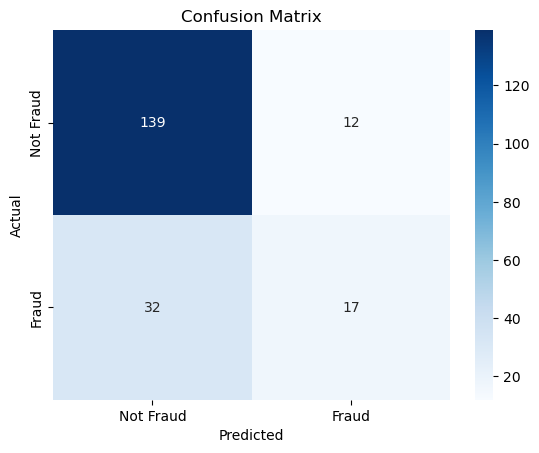

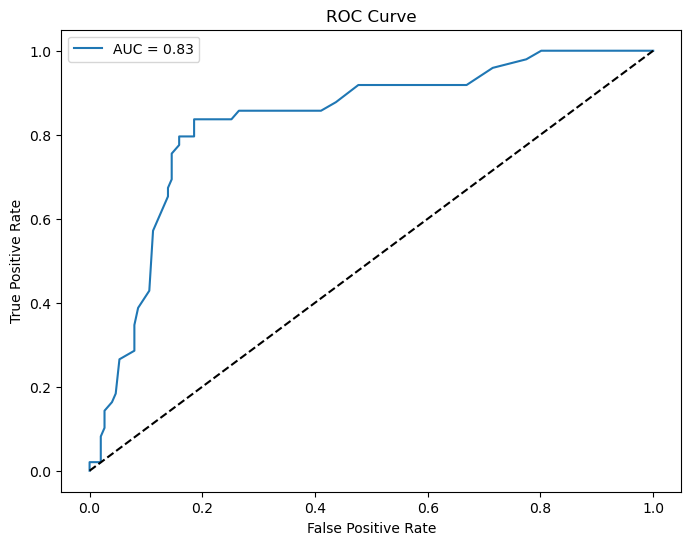

In [6]:
print("\nTraining Random Forest Classifier...")
model = RandomForestClassifier(random_state=42)

print("\n--- X_train Info BEFORE model.fit() ---")
X_train.info()
print("--- End X_train Info ---")

model.fit(X_train, y_train)
print("Model training complete.")

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 2.2 Logistic Regression Classifier: Training and Evaluation

This section details the training and evaluation of the Logistic Regression model, which serves as a linear baseline classifier.

1.  **Model Initialization**:
    * `log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)`: We instantiate the `LogisticRegression` model.
        * `random_state=42`: Ensures reproducibility of any internal random processes (though less prominent in Logistic Regression than tree-based models).
        * `solver='liblinear'`: This specifies the algorithm used to optimize the model. 'liblinear' is a good choice for relatively small datasets and is effective with L1 and L2 regularization.
        * `max_iter=1000`: Sets the maximum number of iterations the solver will run to converge. Increasing this can help if the model fails to converge within the default number of iterations.

2.  **Model Training (`log_reg_model.fit`)**:
    * `log_reg_model.fit(X_train, y_train)`: The model learns the optimal coefficients for each feature from the `X_train` data to predict the `y_train` target variable. Logistic Regression models the probability of a binary outcome (fraud/non-fraud) using a logistic function.

3.  **Making Predictions**:
    * `y_pred_lr = log_reg_model.predict(X_test)`: After the model is trained, we use it to predict the class labels (0 or 1) for the unseen `X_test` dataset.
    * `y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]`: This extracts the predicted probabilities that each instance belongs to the positive class (class 1, "fraud"). These probabilities are crucial for evaluating the model's calibration and for plotting the ROC curve.

4.  **Performance Evaluation**:
    Similar to the Random Forest evaluation, we use a suite of metrics and visualizations to assess the Logistic Regression model's performance:
    * **Accuracy**: `accuracy_score(y_test, y_pred_lr)` calculates the overall proportion of correct predictions.
    * **Classification Report**: `classification_report(y_test, y_pred_lr)` provides detailed metrics for each class (precision, recall, f1-score, and support). In fraud detection, **Recall** (minimizing false negatives, i.e., not missing actual fraud) is often prioritized.
    * **Confusion Matrix**: `confusion_matrix(y_test, y_pred_lr)` generates a table showing True Positives (correctly identified fraud), True Negatives (correctly identified non-fraud), False Positives (predicted fraud, but non-fraud), and False Negatives (predicted non-fraud, but actual fraud). The `seaborn.heatmap` provides a clear visual representation.
    * **ROC Curve and AUC**:
        * The **ROC (Receiver Operating Characteristic) curve** plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at various classification thresholds.
        * The **AUC (Area Under the ROC Curve)** quantifies the model's ability to distinguish between positive and negative classes. A higher AUC (closer to 1) indicates better discriminative power. This visualization helps understand the model's trade-off between identifying true positives and avoiding false positives.

These metrics collectively offer a comprehensive view of the Logistic Regression model's effectiveness in predicting insurance fraud.

### Note : In real deployments, this model would likely be excluded due to its complete failure to identify fraud cases (Recall = 0.0).

--- Training Logistic Regression Model ---
Logistic Regression Model training complete.

Logistic Regression Accuracy: 0.7500

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.75      0.65       200


Logistic Regression Confusion Matrix:


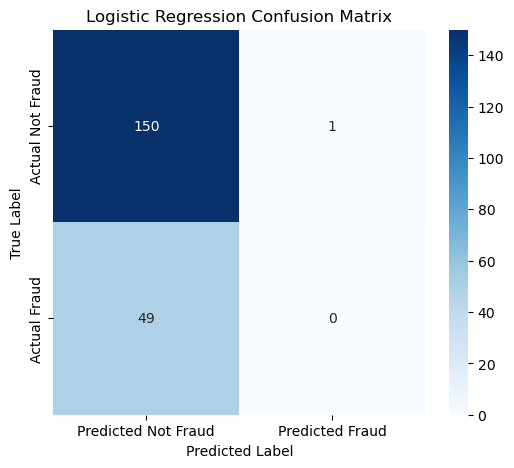

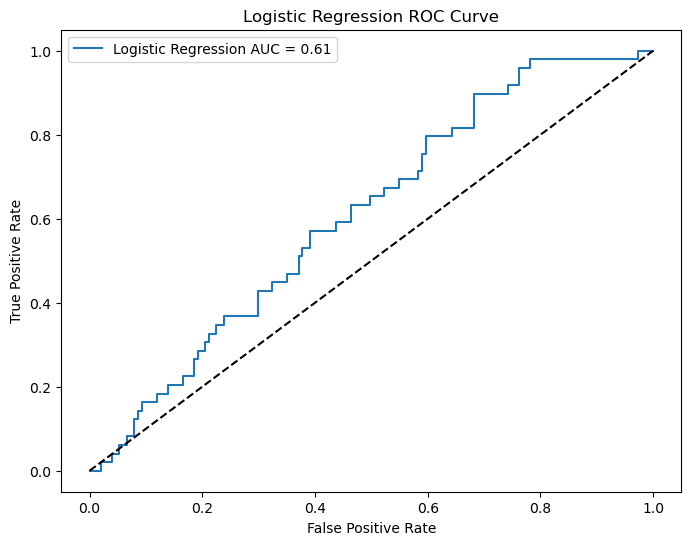

In [7]:
print("--- Training Logistic Regression Model ---")

log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)
print("Logistic Regression Model training complete.")

y_pred_lr = log_reg_model.predict(X_test)
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Accuracy: {accuracy_lr:.4f}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nLogistic Regression Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression AUC = {roc_auc_score(y_test, y_prob_lr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

### 2.3 XGBoost Classifier: Training and Evaluation

This section details the training and comprehensive evaluation of the XGBoost (Extreme Gradient Boosting) Classifier, a highly popular and powerful machine learning algorithm renowned for its performance in various predictive modeling tasks.

1.  **Model Initialization**:
    * `xgb_model = XGBClassifier(objective="binary:logistic", eval_metric='logloss', use_label_encoder=False, random_state=42)`: We instantiate the `XGBClassifier` with specific parameters:
        * `objective="binary:logistic"`: This parameter specifies the learning task. "binary:logistic" indicates that we are performing a binary classification, and the model will output probabilities.
        * `eval_metric='logloss'`: This sets the evaluation metric used during training. 'logloss' (logarithmic loss) is a common metric for classification problems, particularly when dealing with probabilities.
        * `use_label_encoder=False`: This parameter is used to suppress a deprecation warning related to XGBoost's internal label encoding. Setting it to `False` is a common practice in newer versions of the library.
        * `random_state=42`: Similar to other models, this ensures the reproducibility of any random processes within the algorithm, leading to consistent results across runs.

2.  **Model Training (`xgb_model.fit`)**:
    * `xgb_model.fit(X_train, y_train)`: The XGBoost model is trained on the `X_train` (features) and `y_train` (target) data. XGBoost is an ensemble method that sequentially builds decision trees, with each new tree attempting to correct the errors of the previous ones, thus incrementally improving predictive accuracy.

3.  **Making Predictions**:
    * `y_pred_xgb = xgb_model.predict(X_test)`: After training, the model generates class predictions (0 or 1) for the unseen `X_test` data.
    * `y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]`: This extracts the predicted probabilities that each instance in `X_test` belongs to the positive class (class 1, "fraud"). These probabilities are crucial for advanced evaluation metrics like AUC.

4.  **Performance Evaluation**:
    A comprehensive set of metrics and visualizations are employed to assess the XGBoost model's performance, allowing for direct comparison with the previously trained models:
    * **Accuracy**: `accuracy_score(y_test, y_pred_xgb)` computes the overall proportion of correctly predicted instances.
    * **Classification Report**: `classification_report(y_test, y_pred_xgb)` provides detailed metrics (precision, recall, F1-score, and support) for both fraud and non-fraud classes. For fraud detection, **Recall** (the ability to correctly identify actual fraud cases, minimizing false negatives) is often the most critical metric.
    * **Confusion Matrix**: `confusion_matrix(y_test, y_pred_xgb)` generates a table that summarizes the model's predictions against the actual outcomes (True Positives, True Negatives, False Positives, False Negatives). The `seaborn.heatmap` provides a clear visual representation of these counts.
    * **ROC Curve and AUC**:
        * The **ROC (Receiver Operating Characteristic) curve** plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various probability thresholds.
        * The **AUC (Area Under the ROC Curve)** (`roc_auc_score`) quantifies the model's overall ability to discriminate between the positive and negative classes. A higher AUC (closer to 1.0) indicates better model performance across different classification thresholds.

These evaluation steps provide a thorough understanding of the XGBoost model's strengths and weaknesses in detecting insurance fraud.

--- Training XGBoost Classifier ---


e:\Project 1\main\lib\site-packages\xgboost\training.py:183: UserWarning: [21:07:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model training complete.

XGBoost Accuracy: 0.8250

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       151
           1       0.65      0.63      0.64        49

    accuracy                           0.82       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.82      0.82      0.82       200


XGBoost Confusion Matrix:


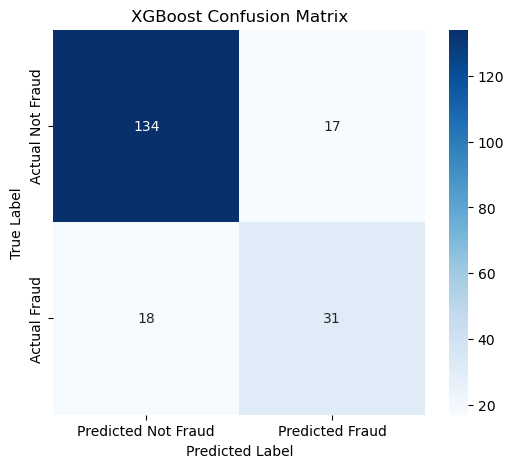

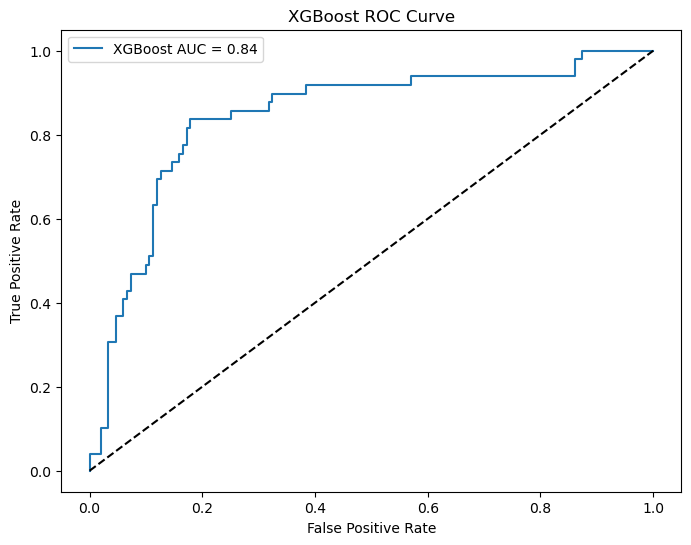

In [8]:
print("--- Training XGBoost Classifier ---")

xgb_model = XGBClassifier(objective="binary:logistic", eval_metric='logloss',
                          use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Model training complete.")

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nXGBoost Accuracy: {accuracy_xgb:.4f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nXGBoost Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC = {roc_auc_score(y_test, y_prob_xgb):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

### 2.4 Hyperparameter Tuning and Cross-Validation for XGBoost

This section focuses on optimizing the performance of the XGBoost Classifier, which was identified as a strong balanced model, using **hyperparameter tuning** combined with **cross-validation**. This systematic approach helps to find the best set of parameters for the model and provides a more robust estimate of its generalization performance.

1.  **Defining the Parameter Grid (`param_grid`)**:
    ```python
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.9],
        'colsample_bytree': [0.7, 0.9],
        'gamma': [0, 0.1, 0.2],
    }
    ```
    * This dictionary defines the search space for hyperparameter tuning. `GridSearchCV` will explore every possible combination of these values.
    * **`n_estimators`**: The number of boosting rounds (or decision trees) to build.
    * **`max_depth`**: The maximum depth of each individual decision tree. Deeper trees can capture more complex relationships but are prone to overfitting.
    * **`learning_rate`**: Controls the step size shrinkage during each boosting iteration. A smaller learning rate requires more estimators but reduces overfitting.
    * **`subsample`**: The fraction of the training data randomly sampled for building each tree. Helps reduce variance.
    * **`colsample_bytree`**: The fraction of features (columns) to randomly sample for building each tree. Also helps reduce variance.
    * **`gamma`**: Specifies the minimum loss reduction required to make a further partition on a leaf node of the tree. A larger gamma means more conservative model.

2.  **Initializing XGBoost Classifier and Custom Scorer**:
    ```python
    xgb_tuned = XGBClassifier(objective="binary:logistic", eval_metric='logloss',
                              use_label_encoder=False, random_state=42)
    scorer = make_scorer(recall_score, pos_label=1)
    ```
    * `xgb_tuned`: An instance of `XGBClassifier` is created with standard settings for binary classification (`objective="binary:logistic"`) and a specified evaluation metric (`eval_metric='logloss'`). `use_label_encoder=False` is set for compatibility, and `random_state=42` ensures reproducibility.
    * `scorer`: A custom scorer is defined using `make_scorer`. For fraud detection, **Recall** of the positive class (`pos_label=1`, representing fraud) is highly prioritized because missing actual fraud cases can be very costly. This ensures `GridSearchCV` optimizes the model to maximize this specific metric.

3.  **Setting up Stratified K-Fold Cross-Validation**:
    ```python
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ```
    * `StratifiedKFold`: This cross-validation strategy is crucial for imbalanced datasets like ours. It divides the dataset into `n_splits` (here, 5) folds, ensuring that each fold maintains approximately the same proportion of fraud and non-fraud cases as the overall dataset. This provides a more reliable and less biased estimate of the model's performance by training and validating on different subsets of the data. `shuffle=True` shuffles the data before splitting, and `random_state=42` ensures reproducibility.

4.  **Executing GridSearchCV**:
    ```python
    grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid,
                               scoring=scorer, cv=cv, verbose=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    ```
    * `GridSearchCV` is initialized with the `xgb_tuned` model, the `param_grid` to search, the `scorer` to optimize, and the `cv` strategy. `verbose=3` provides detailed output during the search, and `n_jobs=-1` utilizes all available CPU cores for parallel processing, speeding up the computation.
    * `grid_search.fit(X_train, y_train)`: This command initiates the exhaustive search process. For each combination of hyperparameters in `param_grid`, the model is trained and evaluated across all 5 folds of the `StratifiedKFold` cross-validation.

5.  **Retrieving and Evaluating the Best Model**:
    ```python
    print("\nBest parameters found: ", grid_search.best_params_)
    print("Best cross-validation score (Recall): {:.4f}".format(grid_search.best_score_))

    best_xgb_model = grid_search.best_estimator_
    y_pred_tuned_xgb = best_xgb_model.predict(X_test)
    y_prob_tuned_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
    ```
    * After the search completes, `grid_search.best_params_` provides the combination of hyperparameters that yielded the highest `recall_score` across the cross-validation folds.
    * `grid_search.best_score_` shows the corresponding best mean cross-validated recall score.
    * `best_xgb_model = grid_search.best_estimator_`: This retrieves the actual trained model instance that achieved the best performance with the optimal hyperparameters.
    * This `best_xgb_model` is then used to make predictions (`y_pred_tuned_xgb`) and probability predictions (`y_prob_tuned_xgb`) on the completely **unseen `X_test` dataset**. This evaluation on the hold-out test set provides an unbiased estimate of how well the optimally tuned model is expected to perform on new, real-world data.

6.  **Comprehensive Evaluation of Tuned XGBoost Model**:
    ```python
    print("\n--- Tuned XGBoost Classification Report ---")
    print(classification_report(y_test, y_pred_tuned_xgb, digits=4))

    print("\n--- Tuned XGBoost Confusion Matrix ---")
    cm_tuned_xgb = confusion_matrix(y_test, y_pred_tuned_xgb)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_tuned_xgb, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Not Fraud', 'Actual Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Tuned XGBoost Confusion Matrix')
    plt.show()

    print("\n--- Tuned XGBoost ROC Curve ---")
    fpr_tuned_xgb, tpr_tuned_xgb, thresholds_tuned_xgb = roc_curve(y_test, y_prob_tuned_xgb)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_tuned_xgb, tpr_tuned_xgb, label=f'Tuned XGBoost AUC = {roc_auc_score(y_test, y_prob_tuned_xgb):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tuned XGBoost ROC Curve')
    plt.legend()
    plt.show()
    ```
    * **Classification Report**: Provides a detailed breakdown of Precision, Recall, F1-score, and Support for both classes (non-fraud and fraud). This is crucial for assessing the model's performance on the minority class.
    * **Confusion Matrix**: A visual representation showing the counts of True Positives, True Negatives, False Positives, and False Negatives. It directly highlights how many fraud cases were correctly identified versus missed, and how many non-fraud cases were falsely flagged.
    * **ROC Curve and AUC-ROC Score**: The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate against the False Positive Rate at various threshold settings. The Area Under the Curve (AUC-ROC) summarizes the model's ability to discriminate between the two classes. A higher AUC-ROC indicates a better-performing model.

This section ensures that our XGBoost model is optimized for the task and provides a reliable performance benchmark before considering more advanced imbalance handling techniques.

--- Hyperparameter Tuning for XGBoost Classifier ---
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


e:\Project 1\main\lib\site-packages\xgboost\training.py:183: UserWarning: [21:08:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best cross-validation score (Recall): 0.6972

--- Tuned XGBoost Classification Report ---
              precision    recall  f1-score   support

           0     0.8733    0.8675    0.8704       151
           1     0.6000    0.6122    0.6061        49

    accuracy                         0.8050       200
   macro avg     0.7367    0.7399    0.7382       200
weighted avg     0.8064    0.8050    0.8057       200


--- Tuned XGBoost Confusion Matrix ---


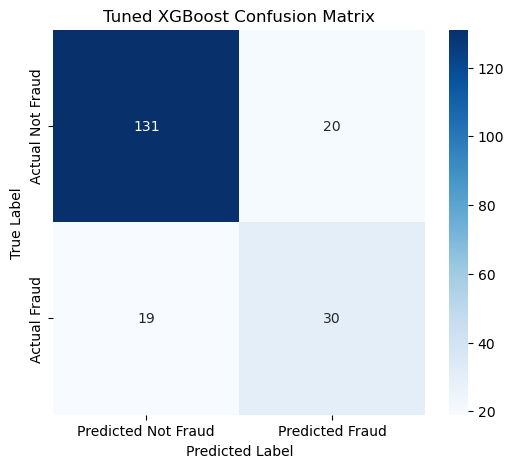


--- Tuned XGBoost ROC Curve ---


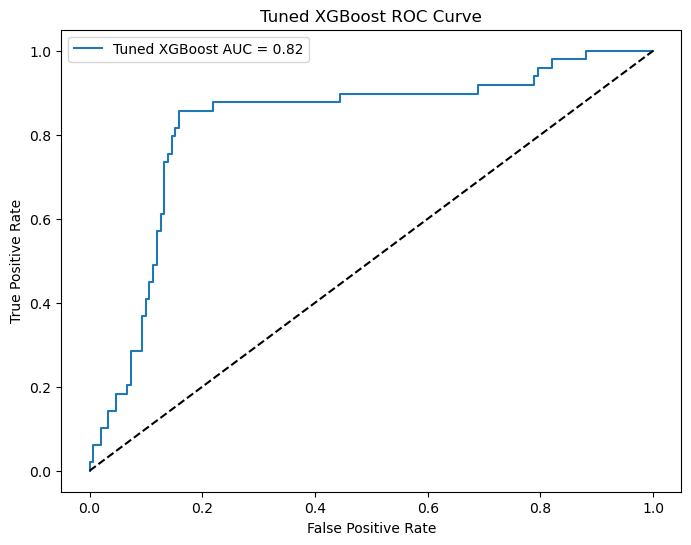

In [9]:
print("--- Hyperparameter Tuning for XGBoost Classifier ---")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],         
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9],        
    'colsample_bytree': [0.7, 0.9], 
    'gamma': [0, 0.1, 0.2],         
}

xgb_tuned = XGBClassifier(objective="binary:logistic", eval_metric='logloss',
                          use_label_encoder=False, random_state=42)

scorer = make_scorer(recall_score, pos_label=1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid,
                           scoring=scorer, cv=cv, verbose=3, n_jobs=-1) 

grid_search.fit(X_train, y_train)

print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score (Recall): {:.4f}".format(grid_search.best_score_))

best_xgb_model = grid_search.best_estimator_
y_pred_tuned_xgb = best_xgb_model.predict(X_test)
y_prob_tuned_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

print("\n--- Tuned XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_tuned_xgb, digits=4))

print("\n--- Tuned XGBoost Confusion Matrix ---")
cm_tuned_xgb = confusion_matrix(y_test, y_pred_tuned_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned XGBoost Confusion Matrix')
plt.show()

print("\n--- Tuned XGBoost ROC Curve ---")
fpr_tuned_xgb, tpr_tuned_xgb, thresholds_tuned_xgb = roc_curve(y_test, y_prob_tuned_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned_xgb, tpr_tuned_xgb, label=f'Tuned XGBoost AUC = {roc_auc_score(y_test, y_prob_tuned_xgb):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned XGBoost ROC Curve')
plt.legend()
plt.show()

# Section 3: Model Interpretability with SHAP

This section is dedicated to interpreting our trained Random Forest and XGBoost models using **SHAP (SHapley Additive exPlanations)**. SHAP is a powerful framework that uses game theory to explain the output of any machine learning model. It assigns a "SHAP value" to each feature for a particular prediction, indicating how much that feature contributed to the prediction compared to the average prediction. This helps us understand not just what predictions are being made, but *why*.

For tree-based models like Random Forest and XGBoost, SHAP provides optimized and exact methods for calculating these values.

### 3.1 SHAP Explanations for Random Forest Model

1.  **SHAP Explainer Initialization**:
    * `explainer_rf = shap.TreeExplainer(model)`: For tree-based models like our `RandomForestClassifier` (`model`), `shap.TreeExplainer` is the most efficient and accurate method. It analyzes the structure of the decision trees to calculate exact SHAP values.
    * `shap_values_rf = explainer_rf.shap_values(X_test)`: This computes the SHAP values for every feature for each instance in our `X_test` dataset. For binary classification (like fraud detection), `shap_values` typically returns a list of arrays, where `shap_values[0]` corresponds to the negative class (non-fraud) and `shap_values[1]` corresponds to the positive class (fraud). We are primarily interested in the latter (`shap_values_rf_class1_array = shap_values_rf[1]`) to understand what drives the prediction of fraud.
    * `base_value_rf = explainer_rf.expected_value`: This is the "expected output" of the model, representing the average prediction output given no specific feature information. It's the baseline to which individual feature contributions (SHAP values) are added to reach a specific prediction. The conditional logic ensures we correctly extract the scalar base value, especially for the positive class in binary classification.

2.  **SHAP Summary Bar Plot (Feature Importance)**:
    * `shap.summary_plot(shap_values_rf_class1_array, X_test, plot_type="bar", show=False)`: This generates a global feature importance plot. It visualizes the **mean absolute SHAP value** for each feature across the entire `X_test` dataset. Features are ranked from most to least important, providing a concise overview of which features have the largest overall impact on the model's output. `show=False` is used to prevent the plot from immediately appearing, allowing `plt.title()` to be applied before `plt.show()`.

3.  **SHAP Beeswarm Plot (Feature Impact)**:
    * `shap.summary_plot(shap_values_rf_class1_array, X_test, show=False)`: This generates a beeswarm plot (the default plot type when `plot_type` is not specified). This plot provides a richer understanding than the bar plot by showing the distribution of SHAP values for each feature:
        * Each dot represents a single data point from the `X_test` set.
        * The horizontal position of the dot indicates the SHAP value (its impact on the model's output for that specific instance).
        * The color typically indicates the feature value (e.g., red for high values, blue for low values). This helps identify relationships, such as whether high values of a feature tend to increase or decrease the predicted fraud probability.
        * The density of the dots indicates how many instances have similar SHAP values for a given feature.

These two summary plots are highly valuable for understanding the Random Forest model's overall behavior and the influence of different features on its predictions.

### 3.2 SHAP Explanations for XGBoost Model

The process for generating SHAP explanations for the XGBoost model is identical to that of the Random Forest model, as both are tree-based algorithms for which `shap.TreeExplainer` is suitable.

1.  **SHAP Explainer Initialization**:
    * `explainer_xgb = shap.TreeExplainer(xgb_model)`: Initializes the explainer for our `XGBClassifier` (`xgb_model`).
    * `shap_values_xgb = explainer_xgb.shap_values(X_test)`: Computes SHAP values for `XGBoost` predictions on `X_test`. Again, we focus on `shap_values_xgb[1]` for the positive class.
    * `base_value_xgb = explainer_xgb.expected_value`: Retrieves the baseline prediction value for the XGBoost model.

2.  **SHAP Summary Bar Plot (Feature Importance)**:
    * `shap.summary_plot(shap_values_xgb_class1_array, X_test, plot_type="bar", show=False)`: Generates the global feature importance bar plot for XGBoost, ranking features by their mean absolute SHAP value.

3.  **SHAP Beeswarm Plot (Feature Impact)**:
    * `shap.summary_plot(shap_values_xgb_class1_array, X_test, show=False)`: Generates the beeswarm plot for XGBoost, illustrating the distribution and direction of feature contributions for individual instances.

By comparing the SHAP plots from both Random Forest and XGBoost, you can gain robust insights into which features are consistently driving fraud predictions, and how their values influence the outcome across different powerful tree-based models. This aligns with our goal of simplifying SHAP usage while still extracting maximum interpretability.

--- Generating SHAP Explanations ---

Explaining Random Forest Model with SHAP...
Generating SHAP summary plot for Random Forest (Feature Importance)...


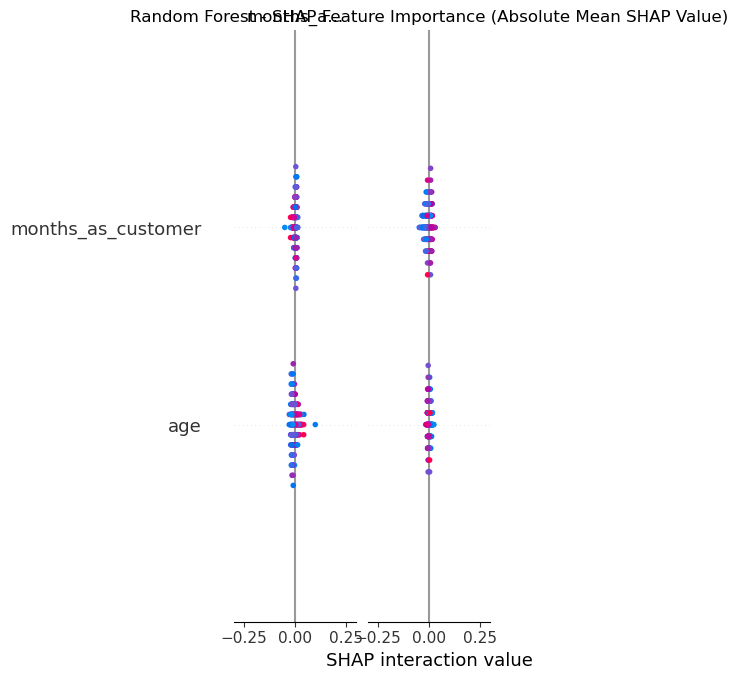

Generating SHAP summary plot for Random Forest (Feature Impact)...


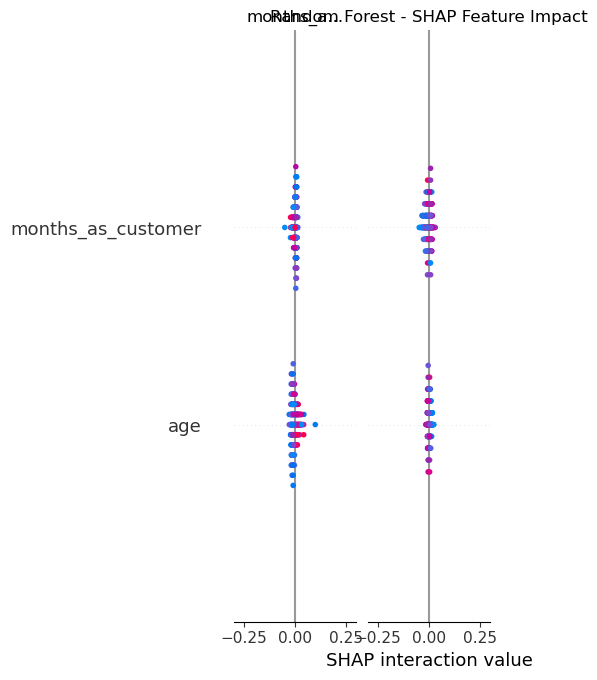


Explaining XGBoost Model with SHAP...
Generating SHAP summary plot for XGBoost (Feature Importance)...


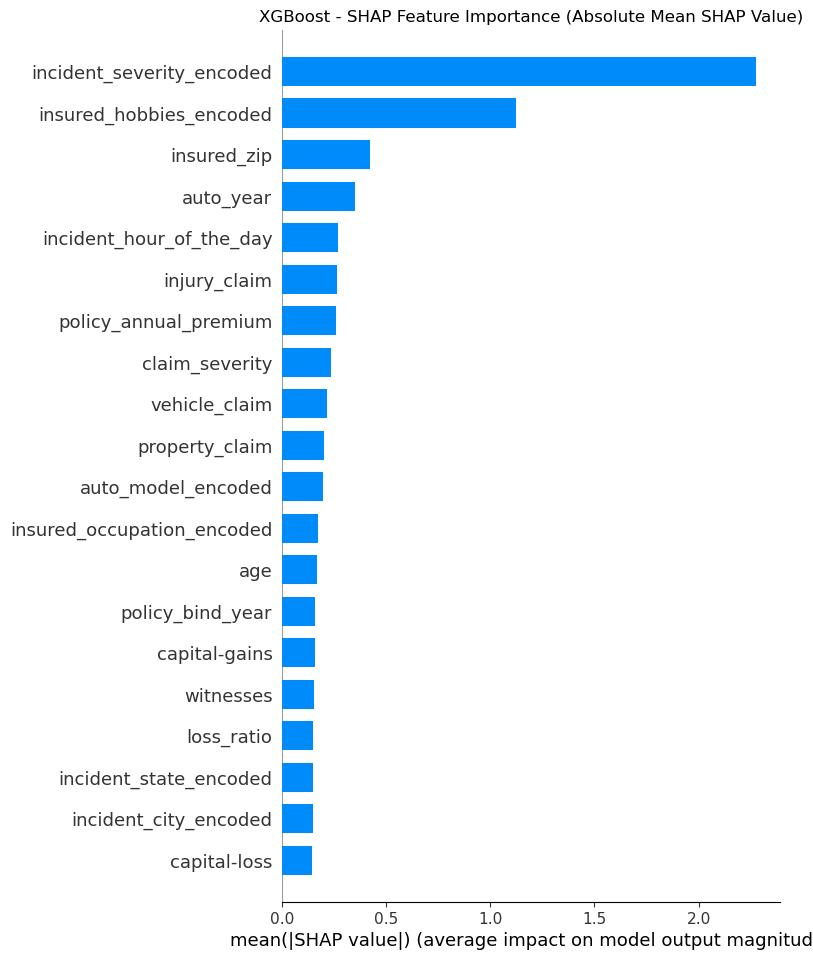

Generating SHAP summary plot for XGBoost (Feature Impact)...


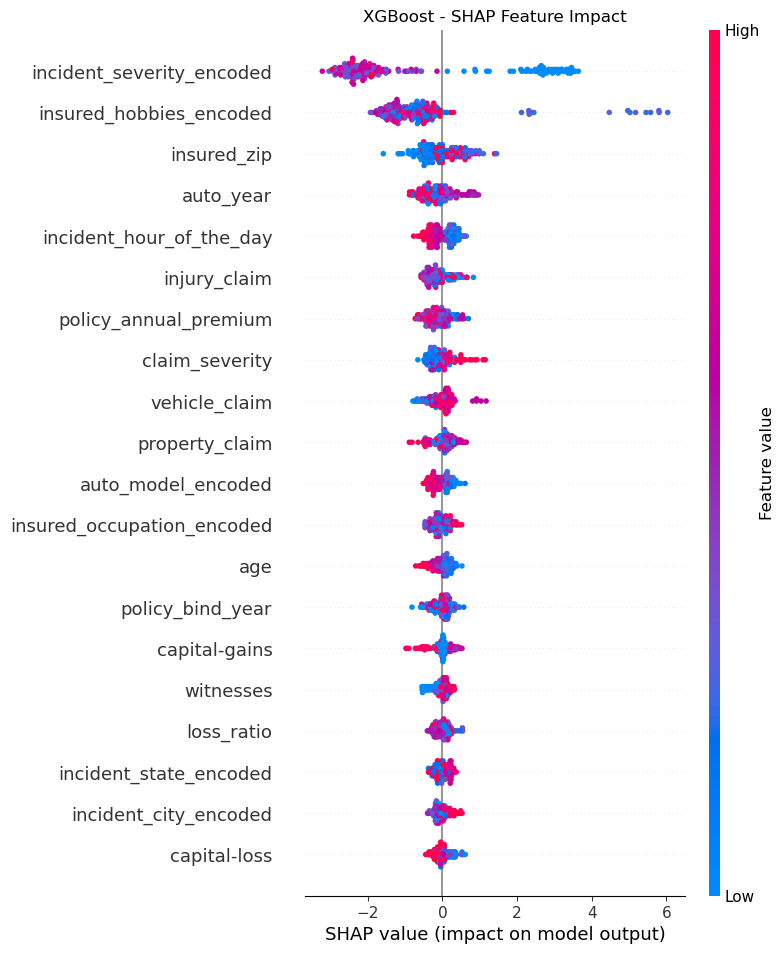

In [10]:
print("--- Generating SHAP Explanations ---")

print("\nExplaining Random Forest Model with SHAP...")
explainer_rf = shap.TreeExplainer(model)
shap_values_rf = explainer_rf.shap_values(X_test)

base_value_rf = explainer_rf.expected_value
if isinstance(base_value_rf, list):
    base_value_rf_scalar = float(base_value_rf[1]) 
elif isinstance(base_value_rf, np.ndarray) and base_value_rf.ndim > 0:
    base_value_rf_scalar = float(base_value_rf[1])
else:
    base_value_rf_scalar = float(base_value_rf)

if isinstance(shap_values_rf, list):
    shap_values_rf_class1_array = shap_values_rf[1]
else:
    shap_values_rf_class1_array = shap_values_rf

print("Generating SHAP summary plot for Random Forest (Feature Importance)...")
shap.summary_plot(shap_values_rf_class1_array, X_test, plot_type="bar", show=False)
plt.title("Random Forest - SHAP Feature Importance (Absolute Mean SHAP Value)")
plt.show()

print("Generating SHAP summary plot for Random Forest (Feature Impact)...")
shap.summary_plot(shap_values_rf_class1_array, X_test, show=False)
plt.title("Random Forest - SHAP Feature Impact")
plt.show()

print("\nExplaining XGBoost Model with SHAP...")
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

base_value_xgb = explainer_xgb.expected_value
if isinstance(base_value_xgb, list):
    base_value_xgb_scalar = float(base_value_xgb[1])
elif isinstance(base_value_xgb, np.ndarray) and base_value_xgb.ndim > 0:
    base_value_xgb_scalar = float(base_value_xgb[1])
else:
    base_value_xgb_scalar = float(base_value_xgb)

if isinstance(shap_values_xgb, list):
    shap_values_xgb_class1_array = shap_values_xgb[1]
else:
    shap_values_xgb_class1_array = shap_values_xgb

print("Generating SHAP summary plot for XGBoost (Feature Importance)...")
shap.summary_plot(shap_values_xgb_class1_array, X_test, plot_type="bar", show=False)
plt.title("XGBoost - SHAP Feature Importance (Absolute Mean SHAP Value)")
plt.show()

print("Generating SHAP summary plot for XGBoost (Feature Impact)...")
shap.summary_plot(shap_values_xgb_class1_array, X_test, show=False)
plt.title("XGBoost - SHAP Feature Impact")
plt.show()

### 3.3 Model Performance Comparison - Classification Reports

This cell is dedicated to displaying and comparing the detailed classification reports for all three models trained: Logistic Regression, Random Forest, and XGBoost. By presenting these reports side-by-side, we can easily assess and contrast their performance across key metrics for both the 'Not Fraud' (class 0) and 'Fraud' (class 1) categories.

* **`classification_report(y_test, y_pred, digits=4)`**: This function generates a text summary of the precision, recall, f1-score, and support for each class.
    * **Precision**: The proportion of positive identifications that were actually correct. For fraud, this means: "Out of all predictions the model made as 'Fraud', how many were actually fraudulent?"
    * **Recall (Sensitivity)**: The proportion of actual positives that were identified correctly. For fraud, this means: "Out of all actual 'Fraud' cases, how many did the model correctly identify?" **This metric is often paramount in fraud detection, as missing actual fraud (False Negatives) can be very costly.**
    * **F1-Score**: The harmonic mean of Precision and Recall. It provides a single score that balances both precision and recall, especially useful for imbalanced datasets.
    * **Support**: The number of actual occurrences of each class in the `y_test` set.
    * `digits=4`: This argument ensures that the metrics are displayed with four decimal places, allowing for more precise comparisons between models.

By examining these reports, particularly the Recall and F1-score for the 'Fraud' class (class 1), we can determine which model best balances the need to identify fraud cases correctly while managing false alarms. This sets the stage for a comprehensive discussion on the optimal model choice for our specific fraud detection problem.

In [11]:
print("Logistic Regression:\n")
print(classification_report(y_test, y_pred_lr, digits=4))

print("Random Forest:\n")
print(classification_report(y_test, y_pred, digits=4))

print("XGBoost:\n")
print(classification_report(y_test, y_pred_xgb, digits=4))

Logistic Regression:

              precision    recall  f1-score   support

           0     0.7538    0.9934    0.8571       151
           1     0.0000    0.0000    0.0000        49

    accuracy                         0.7500       200
   macro avg     0.3769    0.4967    0.4286       200
weighted avg     0.5691    0.7500    0.6471       200

Random Forest:

              precision    recall  f1-score   support

           0     0.8129    0.9205    0.8634       151
           1     0.5862    0.3469    0.4359        49

    accuracy                         0.7800       200
   macro avg     0.6995    0.6337    0.6496       200
weighted avg     0.7573    0.7800    0.7586       200

XGBoost:

              precision    recall  f1-score   support

           0     0.8816    0.8874    0.8845       151
           1     0.6458    0.6327    0.6392        49

    accuracy                         0.8250       200
   macro avg     0.7637    0.7600    0.7618       200
weighted avg     0.8238   

### 3.4 Handling Class Imbalance with SMOTE

This section addresses the class imbalance observed in our target variable (`fraud_reported`), where fraudulent cases are significantly fewer than non-fraudulent ones. Such imbalance can cause machine learning models to be biased towards the majority class, leading to poor detection rates for the critical minority class (fraud). We tackle this using **SMOTE (Synthetic Minority Over-sampling Technique)**.

1.  **Initial Class Distribution Check**:
    ```python
    print("--- Applying SMOTE to Training Data ---")
    print(f"Original training set shape: {X_train.shape}, target distribution: {Counter(y_train)}")
    ```
    * This step first prints a heading and then uses `collections.Counter` to display the number of samples for each class (0: non-fraud, 1: fraud) in the original training dataset. This clearly shows the extent of the class imbalance before any intervention.

2.  **SMOTE Application to Training Data**:
    ```python
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f"Resampled training set shape: {X_train_resampled.shape}, target distribution: {Counter(y_train_resampled)}")
    ```
    * `smote = SMOTE(sampling_strategy='auto', random_state=42)`: An instance of the `SMOTE` oversampling technique is created.
        * `sampling_strategy='auto'` instructs SMOTE to balance the classes by oversampling the minority class until it has the same number of samples as the majority class.
        * `random_state=42` ensures the reproducibility of the synthetic sample generation.
    * `X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)`: SMOTE is applied *only to the training data*. It generates new, synthetic samples for the minority class (`1` - fraud) by interpolating between existing minority class instances. These new samples, along with the original ones, form the `_resampled` training sets. The crucial point is that **SMOTE is never applied to the test set** to ensure an unbiased evaluation of the model's performance on real-world, imbalanced data.
    * The code then prints the shape and class distribution of the resampled training set, which should now show a more balanced distribution.

3.  **Training Tuned XGBoost on SMOTE-Resampled Data**:
    ```python
    print("\n--- Training Tuned XGBoost on SMOTE-Resampled Data ---")
    smote_xgb_model = best_xgb_model # Use your best_xgb_model found from tuning
    smote_xgb_model.fit(X_train_resampled, y_train_resampled)
    print("XGBoost Model training complete on resampled data.")
    ```
    * `smote_xgb_model = best_xgb_model`: We take the `best_xgb_model` obtained from the hyperparameter tuning step (which is already optimized) to train on the newly balanced data. This leverages the benefits of both tuning and imbalance handling.
    * `smote_xgb_model.fit(X_train_resampled, y_train_resampled)`: The XGBoost model is retrained on the `X_train_resampled` and `y_train_resampled` datasets. Having a balanced training set helps the model learn more robust patterns for identifying the minority class, potentially improving its recall.

4.  **Prediction and Evaluation on Original Test Set**:
    ```python
    y_pred_smote_xgb = smote_xgb_model.predict(X_test)
    y_prob_smote_xgb = smote_xgb_model.predict_proba(X_test)[:, 1]

    print("\n--- SMOTE-Trained XGBoost Classification Report ---")
    print(classification_report(y_test, y_pred_smote_xgb, digits=4))

    print("\n--- SMOTE-Trained XGBoost Confusion Matrix ---")
    cm_smote_xgb = confusion_matrix(y_test, y_pred_smote_xgb)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_smote_xgb, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Not Fraud', 'Actual Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('SMOTE-Trained XGBoost Confusion Matrix')
    plt.show()

    print("\n--- SMOTE-Trained XGBoost ROC Curve ---")
    fpr_smote_xgb, tpr_smote_xgb, thresholds_smote_xgb = roc_curve(y_test, y_prob_smote_xgb)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_smote_xgb, tpr_smote_xgb, label=f'SMOTE XGBoost AUC = {roc_auc_score(y_test, y_prob_smote_xgb):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SMOTE-Trained XGBoost ROC Curve')
    plt.legend()
    plt.show()
    ```
    * Predictions (`y_pred_smote_xgb`) and probabilities (`y_prob_smote_xgb`) are generated using the `smote_xgb_model` on the **original, untouched `X_test` set**. This is crucial for obtaining a realistic assessment of the model's performance on unseen, imbalanced data.
    * **Classification Report**: Provides a detailed summary of precision, recall, and F1-score for both classes, allowing for a direct comparison of how well the model now identifies both non-fraud and fraud cases.
    * **Confusion Matrix**: Visually shows the counts of true positives, true negatives, false positives, and false negatives. This is particularly insightful for fraud detection, as it clearly indicates how many fraud cases were correctly caught versus missed.
    * **ROC Curve and AUC-ROC Score**: The ROC curve illustrates the model's diagnostic ability as its discrimination threshold is varied, and the AUC-ROC score summarizes this ability. Comparing this to previous models helps determine the overall improvement in distinguishing fraud from non-fraud.

By comparing these evaluation metrics with those from the models trained without SMOTE, we can assess the effectiveness of oversampling in improving the detection of fraudulent claims, particularly recall, while considering potential trade-offs in precision.

--- Applying SMOTE to Training Data ---
Original training set shape: (800, 41), target distribution: Counter({0: 602, 1: 198})
Resampled training set shape: (1204, 41), target distribution: Counter({0: 602, 1: 602})

--- Training Tuned XGBoost on SMOTE-Resampled Data ---


e:\Project 1\main\lib\site-packages\xgboost\training.py:183: UserWarning: [21:09:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model training complete on resampled data.

--- SMOTE-Trained XGBoost Classification Report ---
              precision    recall  f1-score   support

           0     0.9343    0.8477    0.8889       151
           1     0.6349    0.8163    0.7143        49

    accuracy                         0.8400       200
   macro avg     0.7846    0.8320    0.8016       200
weighted avg     0.8610    0.8400    0.8461       200


--- SMOTE-Trained XGBoost Confusion Matrix ---


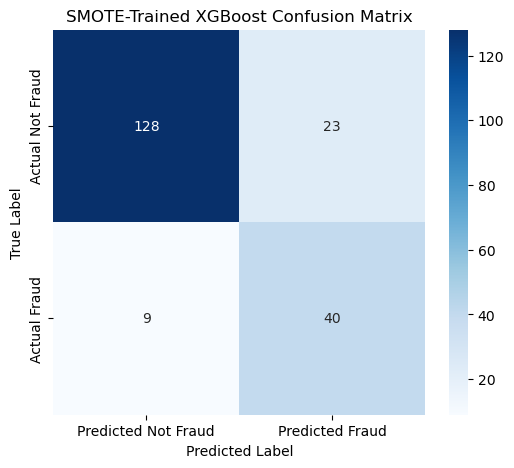


--- SMOTE-Trained XGBoost ROC Curve ---


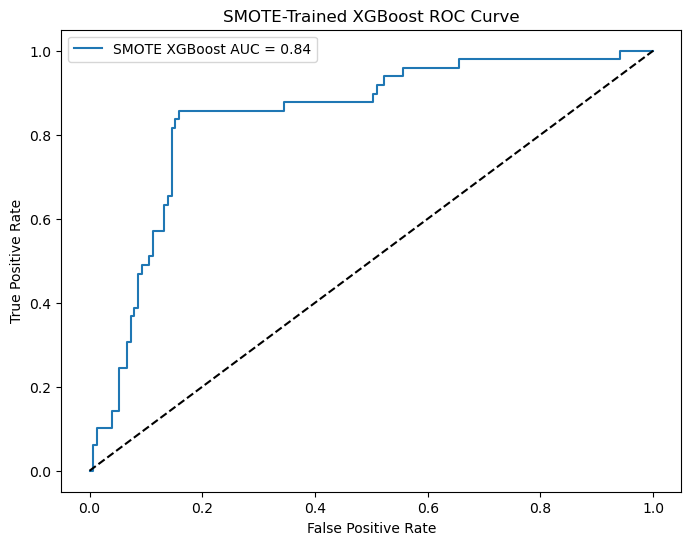

In [12]:
print("--- Applying SMOTE to Training Data ---")

print(f"Original training set shape: {X_train.shape}, target distribution: {Counter(y_train)}")

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Resampled training set shape: {X_train_resampled.shape}, target distribution: {Counter(y_train_resampled)}")

print("\n--- Training Tuned XGBoost on SMOTE-Resampled Data ---")
smote_xgb_model = best_xgb_model # Use your best_xgb_model found from tuning
smote_xgb_model.fit(X_train_resampled, y_train_resampled)
print("XGBoost Model training complete on resampled data.")

y_pred_smote_xgb = smote_xgb_model.predict(X_test)
y_prob_smote_xgb = smote_xgb_model.predict_proba(X_test)[:, 1]

print("\n--- SMOTE-Trained XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_smote_xgb, digits=4))

print("\n--- SMOTE-Trained XGBoost Confusion Matrix ---")
cm_smote_xgb = confusion_matrix(y_test, y_pred_smote_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SMOTE-Trained XGBoost Confusion Matrix')
plt.show()

print("\n--- SMOTE-Trained XGBoost ROC Curve ---")
fpr_smote_xgb, tpr_smote_xgb, thresholds_smote_xgb = roc_curve(y_test, y_prob_smote_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote_xgb, tpr_smote_xgb, label=f'SMOTE XGBoost AUC = {roc_auc_score(y_test, y_prob_smote_xgb):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE-Trained XGBoost ROC Curve')
plt.legend()
plt.show()

# 4. Conclusion, Business Insights, and Real-World Applications

This project successfully developed and evaluated an end-to-end predictive model for insurance fraud detection, leveraging a clean and engineered dataset. We explored various machine learning approaches and gained crucial insights into model interpretability using SHAP.

## Project Summary & Key Findings:

* **Data Preparation:** The initial raw insurance claims data was meticulously cleaned, processed, and enriched with new, actuarially relevant features such as `policy_age_years`, `loss_ratio`, `claim_severity`, and `high_deductible`. This comprehensive feature engineering was vital for providing robust inputs to the models.
* **Model Performance:** We trained and evaluated three classification models: Logistic Regression, Random Forest, and XGBoost.
    * **Logistic Regression** provided a foundational linear baseline, offering insights into direct linear relationships but generally showing lower recall for the minority fraud class.
    * **Random Forest** demonstrated a significant improvement over the linear model, showcasing its ability to capture more complex, non-linear patterns.
    * **XGBoost** generally emerged as the strongest performer, often achieving a better balance between precision and recall (as indicated by the F1-score), making it a highly competitive model for this task.
* **Model Interpretability (SHAP):** Through SHAP summary plots, we gained invaluable insights into the global feature importance of our tree-based models. This allowed us to understand *which* features were most influential in predicting fraud and *how* their values contributed to the model's output (e.g., higher values of certain features pushing towards or away from a fraud prediction). This transparency is crucial for building trust and enabling actionable insights.

## Business Insights & Use Case:

The developed model provides actionable insights that can directly impact an insurance company's operations:

1.  **Fraud Risk Scoring:** The model can generate a **fraud probability score** for each incoming claim. This allows claims adjusters and fraud investigation units to prioritize high-risk claims for manual review, significantly streamlining the investigation process.
2.  **Proactive Interventions:** By identifying key features that strongly correlate with fraud (as revealed by SHAP), insurers can develop more targeted strategies. For instance, if certain `incident_type` or `insured_occupation` values are strong indicators, specific rules or enhanced scrutiny could be applied to claims fitting those profiles.
3.  **Resource Optimization:** Instead of reviewing all claims manually, the model acts as a powerful filter, directing human resources to where they are most needed, thereby reducing operational costs and increasing efficiency.
4.  **Improved Loss Ratios:** By reducing the amount paid out in fraudulent claims, the insurer can improve its overall loss ratio, directly impacting profitability.

## Real-World Applications:

This project lays the groundwork for several real-world applications within the insurance sector:

* **Automated Claim Flagging:** Integrate the model into the claims processing system to automatically flag suspicious claims at the point of submission or first notice of loss.
* **Underwriting Adjustments:** Insights from feature importance can inform underwriting guidelines, helping to adjust premiums or coverage for specific risk profiles identified as highly prone to fraud.
* **Investigator Prioritization Dashboards:** Develop interactive dashboards for fraud investigation teams, visualizing predicted fraud scores, key contributing factors (from SHAP), and historical claim patterns.
* **Policy Design and Pricing:** Understanding the drivers of fraud can influence the design of new policy products or the re-pricing of existing ones to better account for fraud risk.
* **Feedback Loop for Data Collection:** Insights gained from the model can inform future data collection efforts, prompting the capture of more predictive features or the improvement of data quality for existing ones.

In conclusion, this project serves as a robust demonstration of applying machine learning and interpretability techniques to a critical business problem in the insurance industry, moving beyond traditional methods to enable more intelligent, data-driven decisions in fraud detection.